In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load Dataset

The dataset contanins historical sales records of 10 stores and 50 products, from the year 2013 through 2017.

In [73]:
df=pd.read_csv('train.csv')

In [74]:
df

,date,store,item,sales,f0,f1
0,01-01-2013,1,1,13.0,9.0,NaN
1,02-01-2013,1,1,11.0,NaN,NaN
2,03-01-2013,1,1,14.0,NaN,NaN
3,04-01-2013,1,1,13.0,NaN,NaN
4,05-01-2013,1,1,10.0,NaN,NaN
...,...,...,...,...,...,...
912995,27-12-2017,10,50,63.0,NaN,NaN
912996,28-12-2017,10,50,59.0,NaN,NaN
912997,29-12-2017,10,50,74.0,NaN,NaN
912998,30-12-2017,10,50,62.0,NaN,NaN


# Data Cleaning

Now clean the dataset that contains null values or unwanted columns.

In [75]:
df.columns

Index(['date', 'store', 'item', 'sales', 'f0', 'f1'], dtype='object')

In [76]:
df.drop(['f0','f1'],axis=1,inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    913000 non-null  object 
 1   store   913000 non-null  int64  
 2   item    913000 non-null  int64  
 3   sales   912943 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ MB


In [78]:
# Now change the data type of date column for object to datetime 
df['date']=df['date'].astype('datetime64[ns]')

In [79]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,912943.000000
mean,5.500000,25.500000,52.251626
std,2.872283,14.430878,28.801046
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


# Missing Values

In [80]:
# now we will find values if dataset contains.
df.isnull().sum()

date      0
store     0
item      0
sales    57
dtype: int64

In [81]:
# Filling the missing value 
df = df.set_index('date')
df['sales'].fillna(df['sales'].median(),inplace=True)

In [82]:
df

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-02-01,1,1,11.0
2013-03-01,1,1,14.0
2013-04-01,1,1,13.0
2013-05-01,1,1,10.0
...,...,...,...
2017-12-27,10,50,63.0
2017-12-28,10,50,59.0
2017-12-29,10,50,74.0


In [83]:
df = df.reset_index(drop=False) 
df

,date,store,item,sales
0,2013-01-01,1,1,13.0
1,2013-02-01,1,1,11.0
2,2013-03-01,1,1,14.0
3,2013-04-01,1,1,13.0
4,2013-05-01,1,1,10.0
...,...,...,...,...
912995,2017-12-27,10,50,63.0
912996,2017-12-28,10,50,59.0
912997,2017-12-29,10,50,74.0
912998,2017-12-30,10,50,62.0


In [84]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

# Data Preprocessing

In [85]:
# sort the date coumn
df.sort_values(by='date', ascending = True, inplace = True) 

For the purpose of this project, we will only look at the sales of 'item' - 1 from 'store' - 1. The dataset is split into train and test sets, where the train set contains sales record from January 2013 to September 2017 and the test set (validation set) contains sales records of the last three month of 2017.

Some new features have been created from the date field, for the purpose of exploratory data analysis and causal modelling.

In [86]:
# Filter the record with item 1 and store 1 
df=df[(df['store']==1) & (df['item']==1)]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1826 non-null   datetime64[ns]
 1   store   1826 non-null   int64         
 2   item    1826 non-null   int64         
 3   sales   1826 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 71.3 KB


In [88]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') # convert date column to datatime object
# Create Date-related Features to be used for EDA and Supervised ML: Regression
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)

## now split the dataset in train and test
train_df = df[df['date'] <= '2017-09-30']
test_df = df[df['date'] > '2017-09-30']


In [89]:
train_df.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13.0,2013,1,1,1
31,2013-01-02,1,1,11.0,2013,1,2,2
59,2013-01-03,1,1,15.0,2013,1,3,3
90,2013-01-04,1,1,11.0,2013,1,4,4
120,2013-01-05,1,1,16.0,2013,1,5,5


In [90]:
test_df.head()

,date,store,item,sales,year,month,day,weekday
1470,2017-10-01,1,1,11.0,2017,10,1,6
1501,2017-10-02,1,1,16.0,2017,10,2,7
1529,2017-10-03,1,1,18.0,2017,10,3,1
1560,2017-10-04,1,1,19.0,2017,10,4,2
1590,2017-10-05,1,1,17.0,2017,10,5,3


# Data Exploration

<Axes: xlabel='weekday', ylabel='sales'>

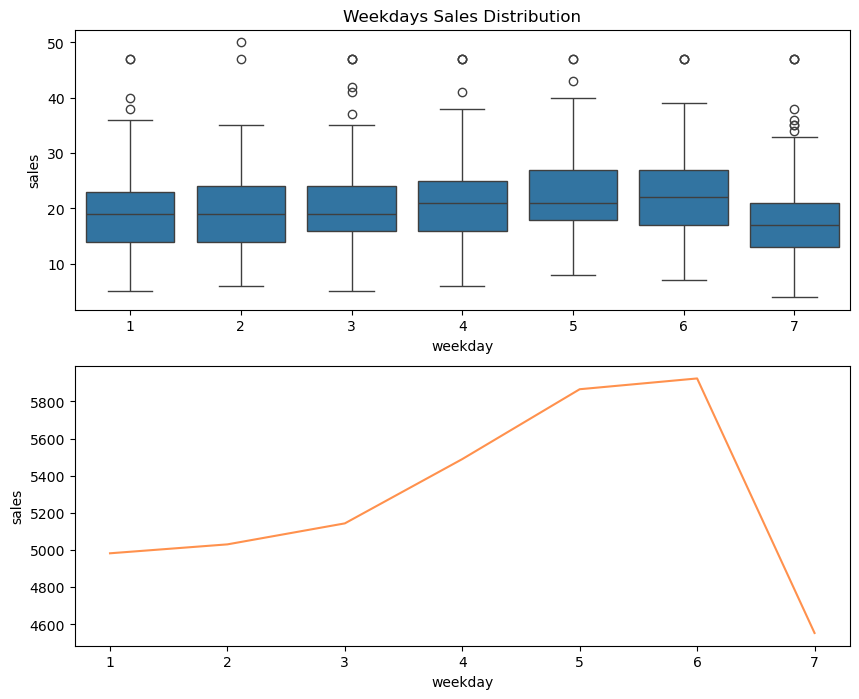

In [91]:
weekday_agg=df.groupby('weekday')['sales'].sum().reset_index()
fig,ax=plt.subplots(2,1,figsize=(10,8))
sns.boxplot(x='weekday',y='sales',data=df,ax=ax[0])
ax[0].set_title('Weekdays Sales Distribution')
sns.lineplot(x='weekday',y='sales',data=weekday_agg,ax=ax[1],color='#FF914D')

## Inference: 
The average number of sales increases over the week, is maximum on Saturday (6), and takes a sharp fall on Sunday (7)


<Axes: xlabel='month', ylabel='sales'>

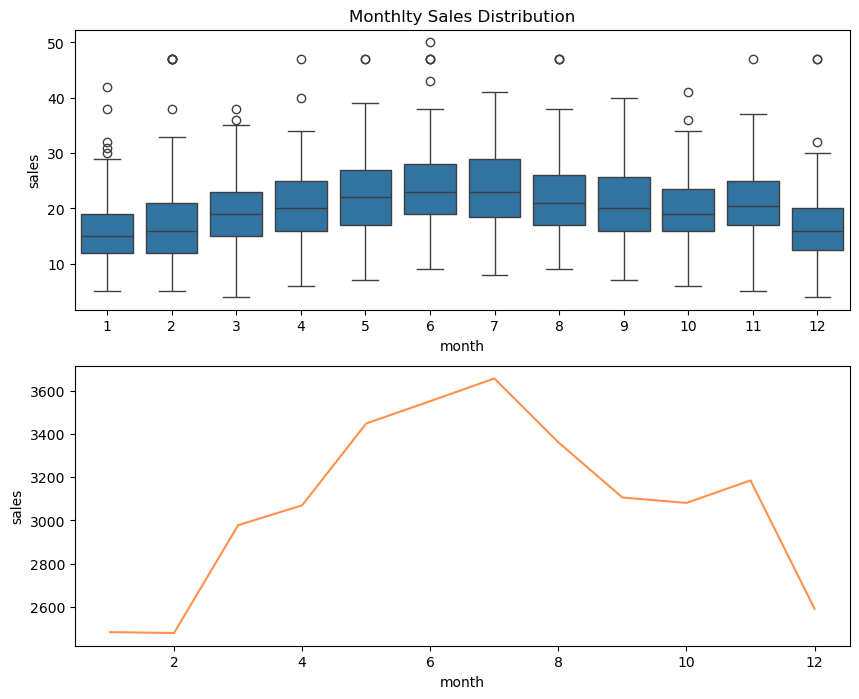

In [92]:
monthly_agg=df.groupby('month')['sales'].sum().reset_index()
fig,ax=plt.subplots(2,1,figsize=(10,8))
sns.boxplot(x='month',y='sales',data=df,ax=ax[0])
ax[0].set_title('Monthlty Sales Distribution')
sns.lineplot(x='month',y='sales',data=monthly_agg,ax=ax[1],color='#FF914D')

## Inference: 
The number of sales gradually ascends in the first half of the year starting February (2), peaks in July (7), and then gradually descends, before slightly increasing in November (11) and then dropping again in December (12).

<Axes: xlabel='year', ylabel='sales'>

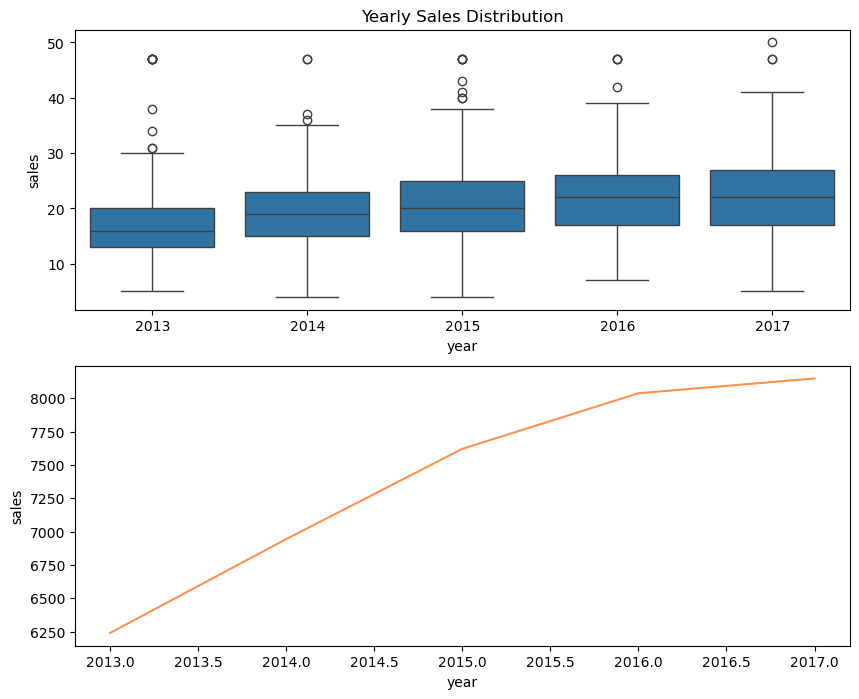

In [93]:
yearly_agg=df.groupby('year')['sales'].sum().reset_index()
fig,ax=plt.subplots(2,1,figsize=(10,8))
sns.boxplot(x='year',y='sales',data=df,ax=ax[0])
ax[0].set_title('Yearly Sales Distribution')
sns.lineplot(x='year',y='sales',data=yearly_agg,ax=ax[1],color='#FF914D')

## Inference: 
From the number of sales vs. year plot, we can infer an increasing trend over the years. The aggregate number of sales has increased from approximately 6000 in 2013 to slightly over 8000 in 2017, i.e. a 33.3% increase in the number of sales approximately. A clear trend is captured by the lineplot above.



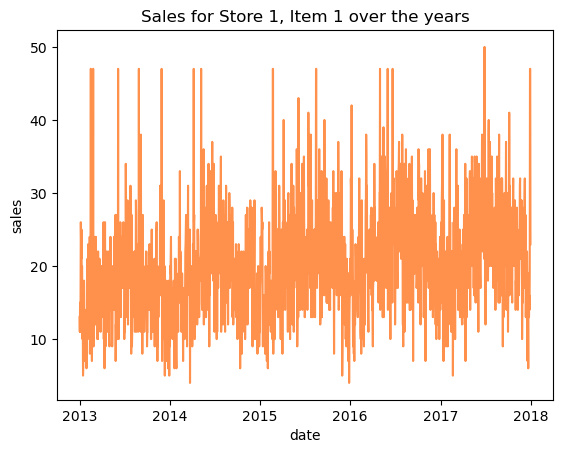

In [94]:
plot = sns.lineplot(x='date', y='sales', data=df,color='#FF914D')
_ = plot.set(title='Sales for Store 1, Item 1 over the years')

## Inference: 
There is a seasonal pattern in the number of sales of 'item' - 1 at 'store' - 1. As also infered in the plot for sales vs. month above, we can see an increase in the sales in the first half of the year, peaking in July, and then a gradual decrease till December. This pattern is repeated each year, 2013 onwards.



# Time Series anlaysis to Forecast Sales

It can be fairly concluded from the data exploratory plots above that there is seasonality present in the product sales data, along with a general increase in the number of sales over the years. Therefore, in order to forecast the number of sales for the last three months of 2017, we will keep in mind the linear trend and seasonality present in the product sales.

# Baseline Model: Seasonal Naive
Before we get to the more advanced time-series forecasting methods, let's take a look at a basic method - Seasonal Naive. It can serve as a quick calculation to get a baseline until something better can come along. Or, perhaps there is very little variance in the data, then this method can be good enough.


In [95]:
# subtract 1 year from test data
dates = (test_df['date'] - np.timedelta64(1, 'Y') + \
        np.timedelta64(1, 'D')).values.astype('datetime64[D]') 
seasonal_naive_sales = train_df[train_df['date'].astype('datetime64[D]').isin(dates)]['sales'] 

# make a copy of the test_df and make naive predictions for the last 3 months of 2017
sn_pred_df = test_df.copy().drop('sales', axis=1)
sn_pred_df['seasonal_naive_sales'] = pd.DataFrame(seasonal_naive_sales).set_index(test_df.index)
sn_pred_df.head()

,date,store,item,year,month,day,weekday,seasonal_naive_sales
1470,2017-10-01,1,1,2017,10,1,6,26.0
1501,2017-10-02,1,1,2017,10,2,7,16.0
1529,2017-10-03,1,1,2017,10,3,1,15.0
1560,2017-10-04,1,1,2017,10,4,2,36.0
1590,2017-10-05,1,1,2017,10,5,3,29.0


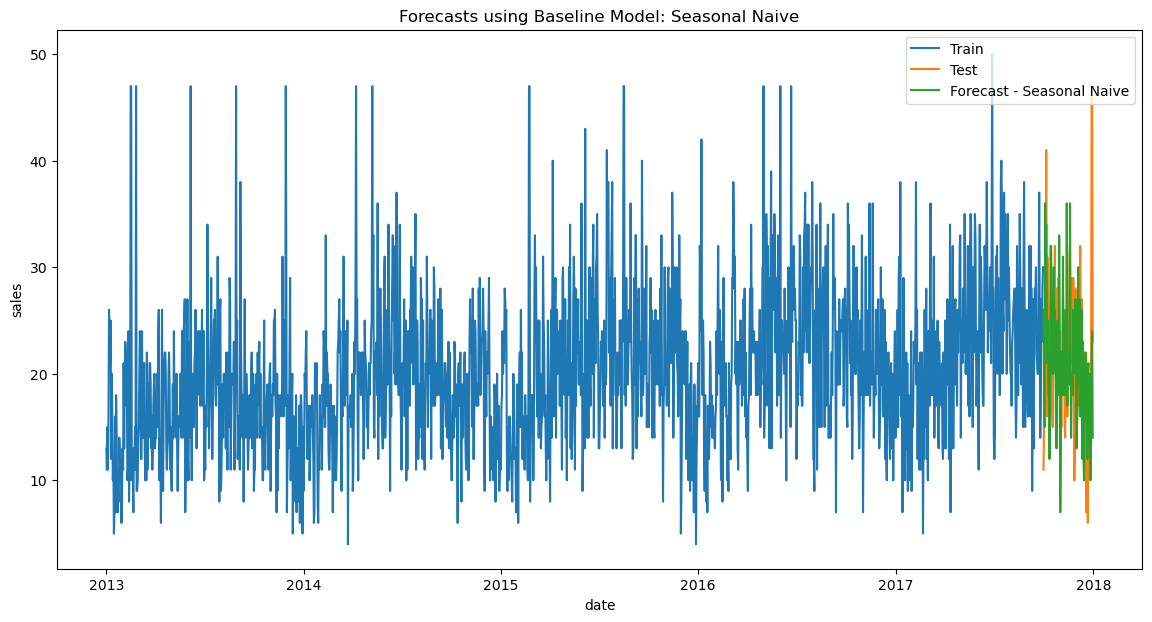

In [96]:
plt.figure(figsize=(14,7))
plt.plot(train_df['date'], train_df['sales'], label='Train')
plt.plot(test_df['date'], test_df['sales'], label='Test')
plt.plot(sn_pred_df['date'], sn_pred_df['seasonal_naive_sales'], label='Forecast - Seasonal Naive')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts using Baseline Model: Seasonal Naive')
plt.show()


In [99]:
mse = mean_squared_error(test_df['sales'],  sn_pred_df['seasonal_naive_sales'])
rmse = mean_squared_error(test_df['sales'],  sn_pred_df['seasonal_naive_sales'], squared=False)
mape = np.mean(np.abs((test_df['sales'] -  sn_pred_df['seasonal_naive_sales']) / test_df['sales'])) * 100  # Avoid division by zero

In [100]:
print(f"MSE: {mse}, RMSE: {rmse}, MAPE: {mape}")

MSE: 59.32608695652174, RMSE: 7.702342952408815, MAPE: 31.191714338258965


## Time Series Decomposition Plot

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [102]:
ts_decomp_df = train_df.set_index('date') # set date as index
ts_decomp_df['sales'] = ts_decomp_df['sales'].astype(float)
ts_decomp_df.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13.0,2013,1,1,1
2013-01-02,1,1,11.0,2013,1,2,2
2013-01-03,1,1,15.0,2013,1,3,3
2013-01-04,1,1,11.0,2013,1,4,4
2013-01-05,1,1,16.0,2013,1,5,5


In [103]:
result=seasonal_decompose(ts_decomp_df['sales'],model='additive',period=30)

In [104]:
trend_additive=result.trend
seasonal_additive=result.seasonal
residual_additive=result.resid

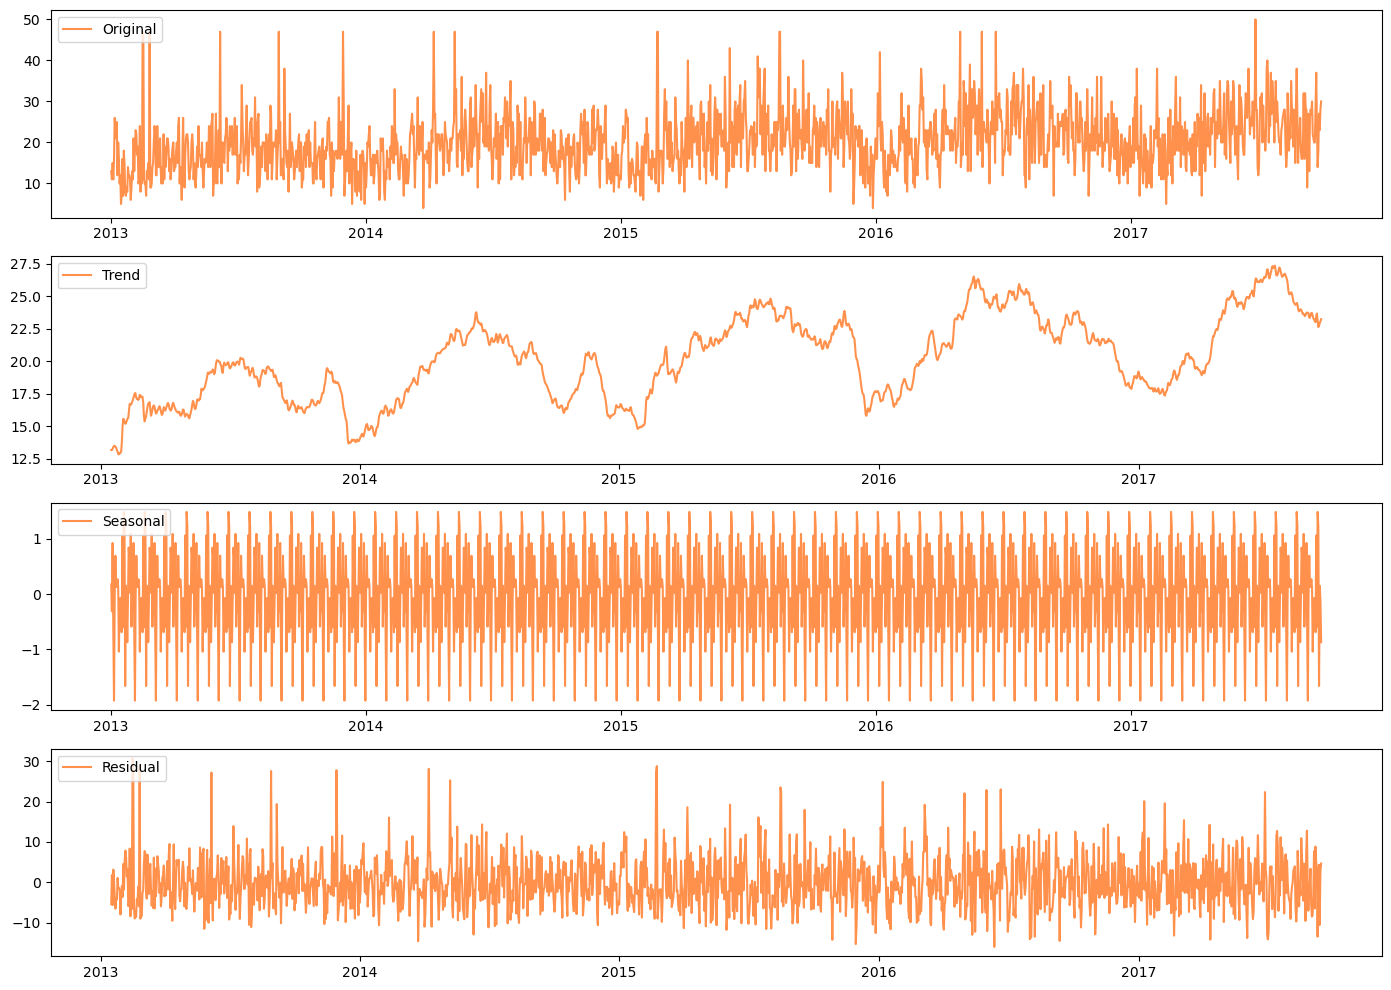

In [105]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(ts_decomp_df['sales'],label='Original',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive,label='Trend',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive,label='Seasonal',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive,label='Residual',color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Determine Residual(Error),Trend and Seasonality
An ETS model has three main components: error, trend, and seasonality. Each can be applied either additively, multiplicatively, or not at all. We will use the above Times Series Decomposition Plot to determine the additive or multiplicative property of the thre components.

Trend - If the trend plot is linear then we apply it additively (A). If the trend line grows or shrinks exponentially, we apply it multiplicatively (M). If there is no clear trend, no trend component is included (N).

Seasonal - If the peaks and valleys for seasonality are constant over time, we apply it additively (A). If the size of the seasonal fluctuations tends to increase or decrease with the level of time series, we apply it multiplicatively (M). If there is no seasonality, it is not applied (N).

Residual(Error) - If the error plot has constant variance over time (peaks and valleys are about the same size), we apply it additively (A). If the error plot is fluctuating between large and small errors over time, we apply it multiplicatively (M).

For our sales data, we see a linear trend plot and a constant seasonality over time, so we will apply trend and seasonality additively. The error component also has constant variance, so we will apply it additively too.

We will use a Exponential Smoothing, a commonly-used local statistical algorithm for time-series forecasting. The Exponential Smoothing method can be defined in terms of an ETS framework, in which the components are calculated using a smoothing technique.

## What is Exponential Smoothing?
This is a very popular scheme to produce a smoothed Time Series. Whereas in Single Moving Averages the past observations are weighted equally, Exponential Smoothing assigns exponentially decreasing weights as the observation get older. In other words, recent observations are given relatively more weight in forecasting than the older observations.
In the case of moving averages, the weights assigned to the observations are the same and are equal to 1/N. In exponential smoothing, however, there are one or more smoothing parameters to be determined (or estimated) and these choices determine the weights assigned to the observations.

There are 3 kinds of smoothing techniques Single, Double and Triple Exponential Smoothing.

Single Exponential Smoothing is used when the time series does not have a trend line and a seasonality component.
Double Exponential Smoothing is used to include forecasting data with a trend, smoothing calculation includes one for the level, and one for the trend.
Triple Exponential smoothing is used when data has trend and seasonality. We include a third equation to take care of seasonality (sometimes called periodicity). The resulting set of equations is called the "Holt-Winters" (HW) method after the names of the inventors.

Since out data has both trend and seasonality components, we will apply Triple Exponential Smoothing.


In [106]:
hw_train_df = train_df[['date', 'sales']].set_index('date')
hw_test_df = test_df[['date', 'sales']].set_index('date')

In [107]:
## Now we will apply triple Exponential Smoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model_1 = ExponentialSmoothing(hw_train_df, trend='add', seasonal='add', seasonal_periods=12)
hw_fit_1 = hw_model_1.fit(remove_bias=False)
pred_fit_1 = pd.Series(hw_fit_1.predict(start=hw_test_df.index[0], end=hw_test_df.index[-1]), 
                       name='pred_sales').reset_index()

hw_model_2 = ExponentialSmoothing(hw_train_df, trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_fit_2 = hw_model_2.fit(remove_bias=False)
pred_fit_2 = pd.Series(hw_fit_2.predict(start=hw_test_df.index[0], end=hw_test_df.index[-1]), 
                       name='pred_sales').reset_index()
print('Forecasts made, ready for evaluation')

Forecasts made, ready for evaluation


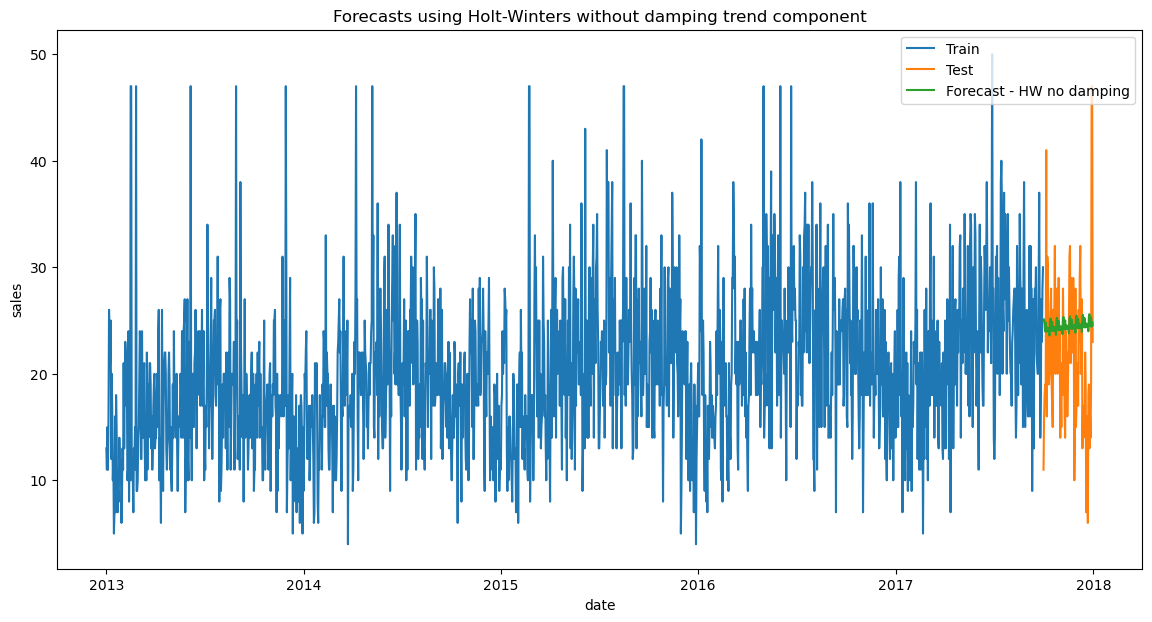

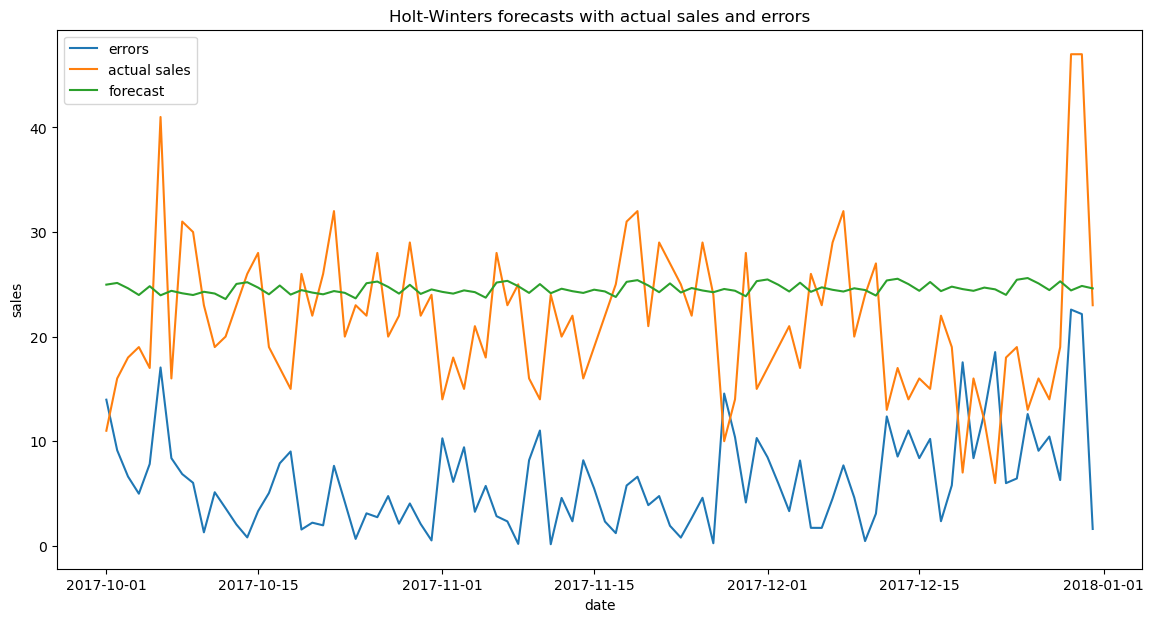

In [108]:
# Merge predictions and actual sales into one df
errors_df_hw = pd.merge(test_df, pred_fit_1, left_on='date', right_on='index')
errors_df_hw = errors_df_hw[['date', 'sales', 'pred_sales']]
errors_df_hw['errors'] = errors_df_hw.sales - errors_df_hw.pred_sales
errors_df_hw.insert(0, 'model', 'Holt-Winters')


# Evaluate the predictions for Holt-Winters without damping trend component
plt.figure(figsize=(14,7))
plt.plot(train_df['date'], train_df['sales'], label='Train')
plt.plot(test_df['date'], test_df['sales'], label='Test')
plt.plot(errors_df_hw['date'], errors_df_hw['pred_sales'], label='Forecast - HW no damping')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts using Holt-Winters without damping trend component')
plt.show()


plt.figure(figsize=(14,7))
plt.plot(errors_df_hw['date'], np.abs(errors_df_hw['errors']),label='errors')
plt.plot(errors_df_hw['date'], errors_df_hw['sales'],label='actual sales')
plt.plot(errors_df_hw['date'], errors_df_hw['pred_sales'],label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Holt-Winters forecasts with actual sales and errors')
plt.show()



In [113]:
mse = mean_squared_error(errors_df_hw['sales'], errors_df_hw['pred_sales'])
rmse = mean_squared_error(errors_df_hw['sales'], errors_df_hw['pred_sales'], squared=False)
mape = np.mean(np.abs((errors_df_hw['sales'] - errors_df_hw['pred_sales']) / errors_df_hw['sales'])) * 100
print(f"MSE: {mse}, RMSE: {rmse}, MAPE: {mape}")

MSE: 61.3271554489675, RMSE: 7.831165650716852, MAPE: 37.75431198773598


# Autoregressive Integrated Moving Average - ARIMA Model

### Step 1 
Is to check whether the data is stationery or not.
Stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). If the mean of a time-series increases over time, then it’s not stationary.

For checking stationery we will perform:
### Augmented Dickey-Fuller Test

In [33]:
arima_df = train_df[['date', 'sales']].set_index('date')
arima_test_df = test_df[['date', 'sales']].set_index('date')


In [34]:
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(arima_df['sales'])
print('Adf test results:')
print(f'Adf statistics: {round(adf_test[0],3)}')
print(f'p_value: {round(adf_test[1],3)}')
print('Crtical Values:')
for key,value in adf_test[4].items():
    print(f' {key}: {round(value,3)}')


Adf test results:
Adf statistics: -4.715
p_value: 0.0
Crtical Values:
 1%: -3.434
 5%: -2.863
 10%: -2.568


As p_value in adf test is less than 0.05 which means it will reject the null hypothesis i.e data is stationery no need for differencing.

# ARIMA Model

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


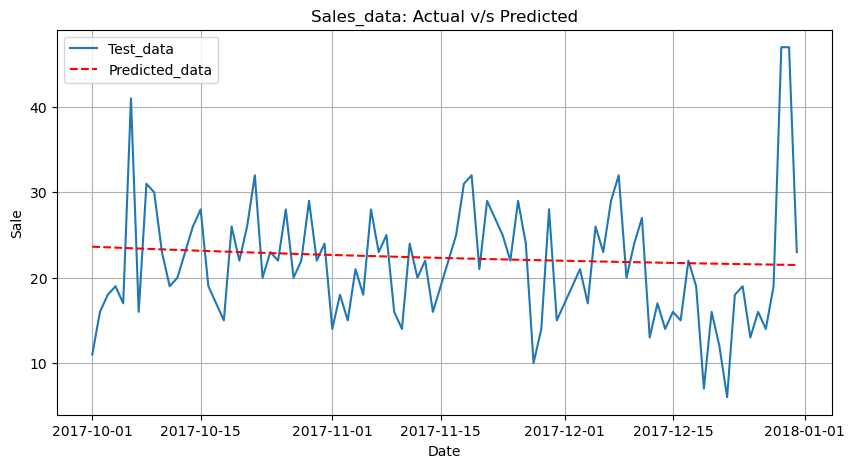

In [56]:
from statsmodels.tsa.arima.model import ARIMA
arima_model=ARIMA(arima_df['sales'],order=(1,0,1))
arima_model_fit=arima_model.fit()
arima_pred=arima_model_fit.predict(start=arima_test_df.index[0],end=arima_test_df.index[-1],dynamic=False)
## ploting arima model on graph
plt.figure(figsize=(10,5))
plt.plot(arima_test_df.index,arima_test_df,label='Test_data')
plt.plot(arima_test_df.index,arima_pred,linestyle='--',color='red',label='Predicted_data')
plt.title('Sales_data: Actual v/s Predicted')
plt.xlabel('Date')
plt.ylabel('Sale')
plt.grid()
plt.legend()
plt.show()

In [57]:
mse=mean_squared_error(arima_test_df,arima_pred)
print(f'MSE: {mse:.3f}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

#  Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(arima_test_df,arima_pred)
print(f'MAPE: {mape:.3%}')

MSE: 51.288
RMSE: 7.162
MAPE: 30.913%


As in ARIMA model mean squared percentage error id 30% which is not good for future sale prediction.So we will apply this data to another model.

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


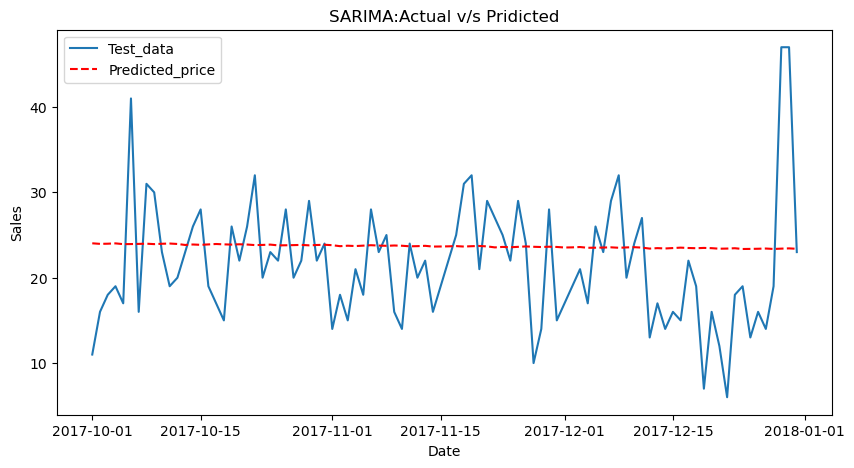

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(arima_df['sales'], order=(1,0,1), seasonal_order=(1,0,1,20),simple_differencing=True)
result = model.fit()
sarima_pred=result.predict(start=arima_test_df.index[0],
                 end=arima_test_df.index[-1],
                 dynamic=False)
# now plot this on graph 
plt.figure(figsize=(10,5))
plt.plot(arima_test_df.index,arima_test_df,label='Test_data')
plt.plot(arima_test_df.index,sarima_pred,color='red',linestyle='--',label='Predicted_price')
plt.title('SARIMA:Actual v/s Pridicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [67]:
mse=mean_squared_error(arima_test_df,sarima_pred)
print(f'MSE: {mse:.3f}')

MSE: 55.288


In [68]:
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

#  Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(arima_test_df,sarima_pred)
print(f'MAPE: {mape:.3%}')

RMSE: 7.436
MAPE: 34.576%


Hence in both the model our time series forecasting is not performing well so we will apply our data set into machine learning linear regreesion alogrithm to predicit sales.

# Supervised Machine Learning: Linear Regression

Let's apply Linear Regression to our time series data in order to forecasts sales.

In [55]:
reg_df=df
reg_df

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13.0,2013,1,1,1
31,2013-01-02,1,1,11.0,2013,1,2,2
59,2013-01-03,1,1,15.0,2013,1,3,3
90,2013-01-04,1,1,11.0,2013,1,4,4
120,2013-01-05,1,1,16.0,2013,1,5,5
...,...,...,...,...,...,...,...,...
1821,2017-12-27,1,1,14.0,2017,12,27,2
1822,2017-12-28,1,1,19.0,2017,12,28,3
1823,2017-12-29,1,1,47.0,2017,12,29,4
1824,2017-12-30,1,1,47.0,2017,12,30,5


## Step 1: Feature Engineering

In [59]:
# Lag features
for i in range(1,8):
    lag_i='lag_'+str(i)
    reg_df[lag_i]=reg_df.sales.shift(i)

# Rolling window
reg_df['rolling_mean']=reg_df.sales.rolling(window=7).mean()
reg_df['rolling_min']=reg_df.sales.rolling(window=7).min()
reg_df['rolling_max']=reg_df.sales.rolling(window=7).max()

reg_df = reg_df.dropna(how='any', inplace=False)
reg_df = reg_df.drop(['store', 'item'], axis=1)

# Split the series to predict the last 3 months of 2017
reg_df = reg_df.set_index('date')
reg_train_df = reg_df.loc[:'2017-09-30']                        
reg_test_df = reg_df.loc['2017-10-01':]

## Step 2: Feature Selection and Model Building

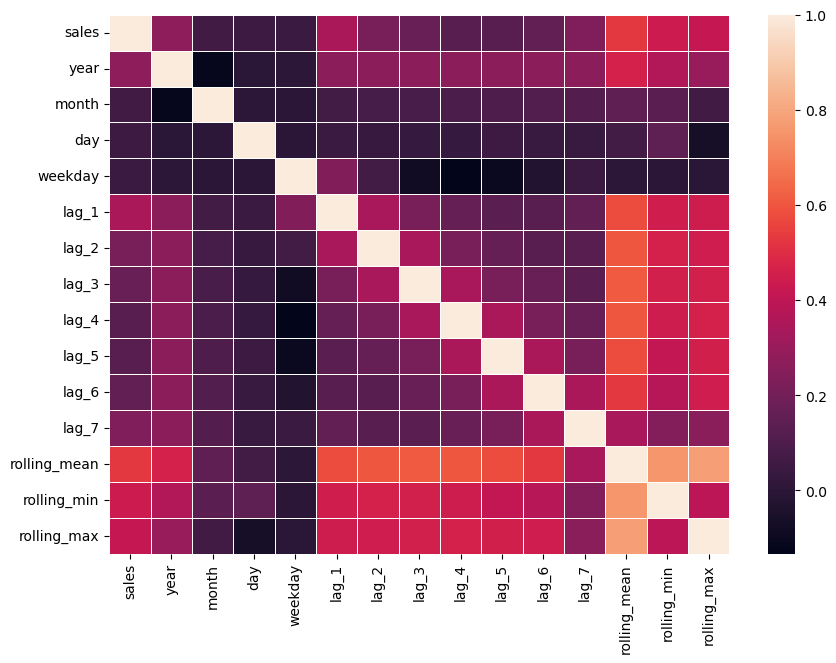

In [60]:
# Correlation matrix with heatmap
corr = reg_train_df.corr()
fig = plt.figure(figsize=(10,7))
_ = sns.heatmap(corr, linewidths=.5)

In [85]:
X_train = reg_train_df.drop(['sales'], axis=1)
y_train = reg_train_df['sales'].values

X_test = reg_test_df.drop(['sales'], axis=1)
y_test = reg_test_df['sales'].values


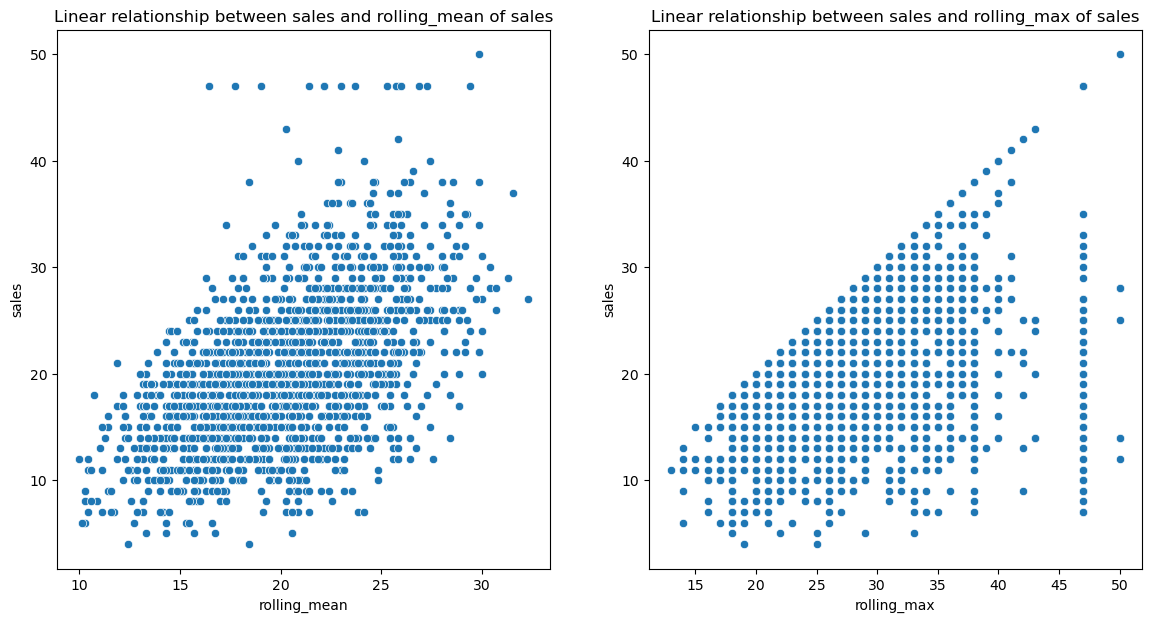

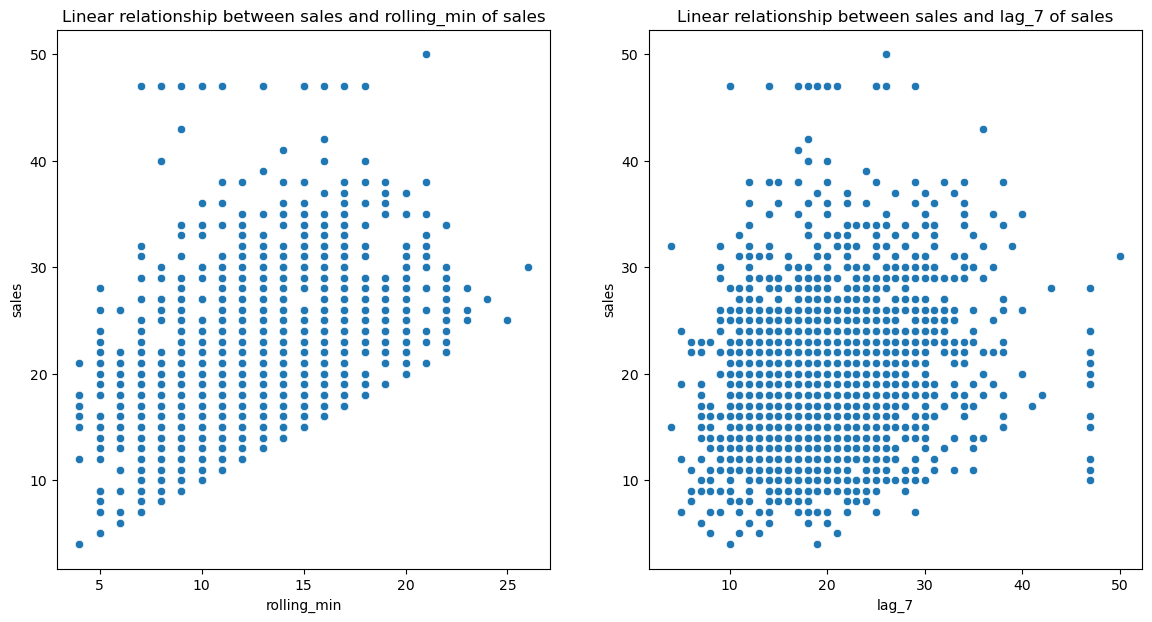

In [86]:
# Checking for a linear relationship of the top features with sales (target variable)

fig, axs = plt.subplots(ncols=2, figsize=(14,7))
sns.scatterplot(x=reg_train_df['rolling_mean'], y=reg_train_df['sales'], ax=axs[0])
axs[0].set(title='Linear relationship between sales and rolling_mean of sales')
sns.scatterplot(x=reg_train_df['rolling_max'], y=reg_train_df['sales'], ax=axs[1])
axs[1].set(title='Linear relationship between sales and rolling_max of sales')

fig, axs = plt.subplots(ncols=2, figsize=(14,7))
sns.scatterplot(x=reg_train_df['rolling_min'], y=reg_train_df['sales'], ax=axs[0])
axs[0].set(title='Linear relationship between sales and rolling_min of sales')
sns.scatterplot(x=reg_train_df['lag_7'], y=reg_train_df['sales'], ax=axs[1])
axs[1].set(title='Linear relationship between sales and lag_7 of sales')

plt.show()

In [87]:
reg_df.corr()['sales']

sales           1.000000
year            0.262281
month           0.069415
day             0.054709
weekday         0.046719
lag_1           0.340732
lag_2           0.210437
lag_3           0.166405
lag_4           0.126734
lag_5           0.117367
lag_6           0.150214
lag_7           0.222997
rolling_mean    0.528261
rolling_min     0.439461
rolling_max     0.424568
Name: sales, dtype: float64

In [91]:
# update X_train, X_test to include top features
X_train = X_train[['rolling_mean', 'rolling_max', 'rolling_min', 'lag_7', 'lag_1']]
X_test = X_test[['rolling_mean', 'rolling_max', 'rolling_min', 'lag_7', 'lag_1']]


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
errors_df = reg_test_df[['sales']]
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
errors_df.insert(0, 'model', 'LinearRegression')

## Step 3: Model Evaluation and Predictions

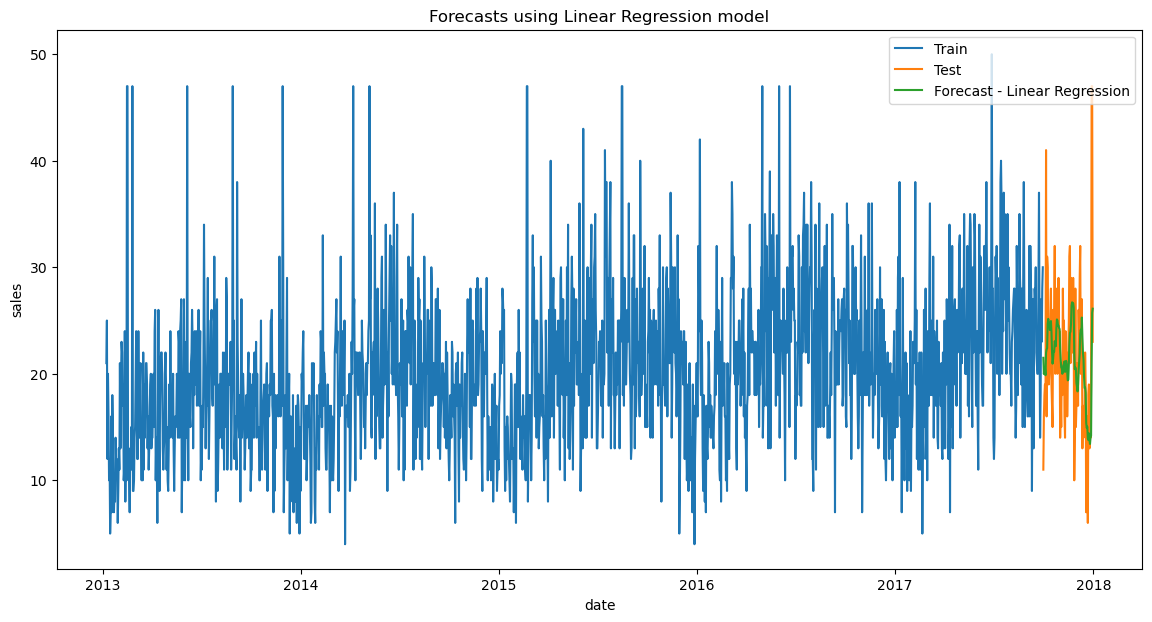

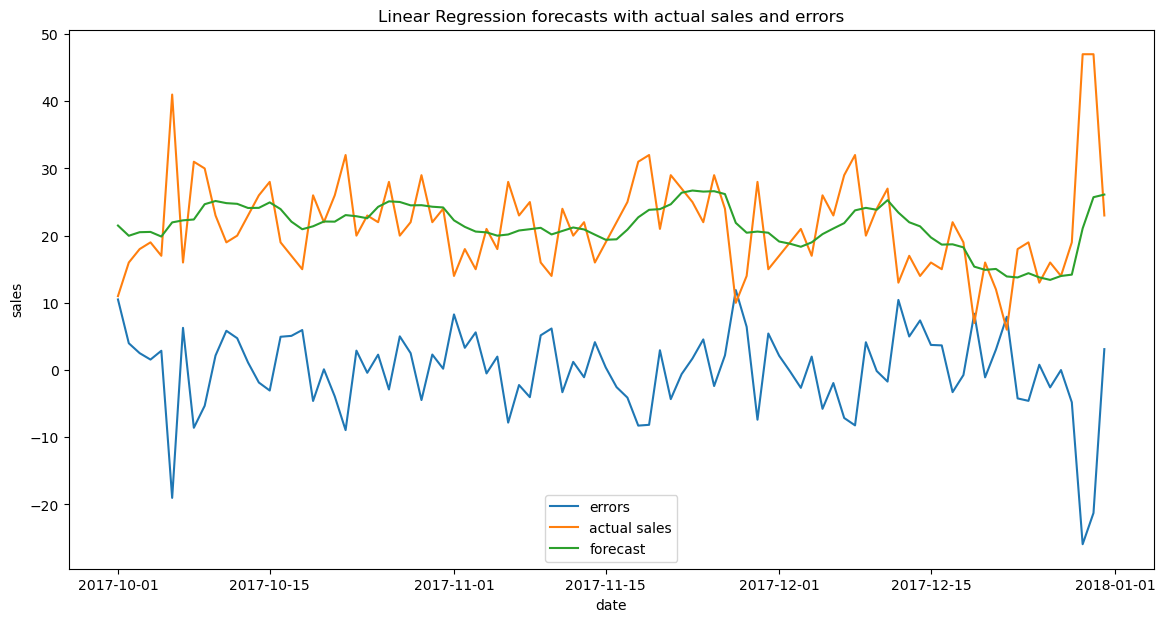

In [93]:
# eval predictions
fig = plt.figure(figsize=(14,7))
plt.plot(reg_train_df.index, reg_train_df['sales'], label='Train')
plt.plot(reg_test_df.index, reg_test_df['sales'], label='Test')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts using Linear Regression model')
plt.show()

fig = plt.figure(figsize=(14,7))
plt.plot(errors_df.index, errors_df.errors, label='errors')
plt.plot(errors_df.index, errors_df.sales, label='actual sales')
plt.plot(errors_df.index, errors_df.pred_sales, label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Linear Regression forecasts with actual sales and errors')
plt.show()


In [96]:
mse=mean_squared_error(y_test,preds)
print(f'MSE: {mse:.3f}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

#  Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test,preds)
print(f'MAPE: {mape:.3%}')

MSE: 38.588
RMSE: 6.212
MAPE: 23.892%


### Inference: 
The Linear regression model captures the upwards as well as the downwards movement in the sales data. Its performance, MAPE 23.8% , is better than our other models and which was the best performing model so far.


# Conclusion
We considered different time-series models as well as a regression model for time series forecasting. From our results we saw that the linear regression model outperformed the other time-series models. Therefore, for this dataset we could use a regression model, rather than a time-series model to forecast sales. One of the main assumptions of regression models is that the patterns in the historical data will be repeated in the future, and since our data was highly seasonal and had a linear trend, it made sense why the linear regression model out-performed the other models.